In [29]:
# Gets POE's Softcore Kalandra data and drops all the columns that have the same values
import pandas as pd

df_sctrade = pd.read_csv("path_of_exile_currency_kalandra.csv")

df_sctrade = df_sctrade.drop(columns=["League", "Confidence", "Patch", "Hardcore", "Standard"])

df_sctrade.describe()

,Value
count,37982.000000
mean,277.857853
std,5171.480542
min,0.000010
25%,0.125000
50%,1.321830
75%,13.649408
max,280000.000000


In [2]:
# Gets POE's Hardcore Kalandra data and drops all the columns that have the same values
import pandas as pd

df_hctrade = pd.read_csv("path_of_exile_currency_hardcore_kalandra.csv")

df_hctrade = df_hctrade.drop(columns=["League", "Confidence", "Patch", "Hardcore", "Standard"])

df_hctrade.describe()

,Value
count,24649.000000
mean,68.209777
std,1053.279693
min,0.000080
25%,0.333330
50%,2.133330
75%,15.000000
max,71448.684210


In [28]:
# Makes a df that show's divine orb's worth in softcore

import pandas as pd

df = pd.read_csv("path_of_exile_currency_kalandra.csv")

divine_df_sctrade = df[df["Get"] == "Divine Orb"]

divine_df_sctrade = divine_df_sctrade.drop(columns=["League", "Confidence", "Patch", "Hardcore", "Standard"])

In [6]:
# Drops the first index as it's an outlyer value, and makes a df that show's divine orb's worth

import pandas as pd

df = pd.read_csv("path_of_exile_currency_hardcore_kalandra.csv")

divine_df_hctrade = df[df["Get"] == "Divine Orb"]

divine_df_hctrade = divine_df_hctrade.drop(index=1100)
divine_df_hctrade = divine_df_hctrade.drop(columns=["League", "Confidence", "Patch", "Hardcore", "Standard"])

Hardcore Trades:
Minimum value: 58.0
Maximum value: 204.42
Mean value: 150.94

Softcore Trades:
Minimum value: 85.0
Maximum value: 210.0
Mean value: 169.17


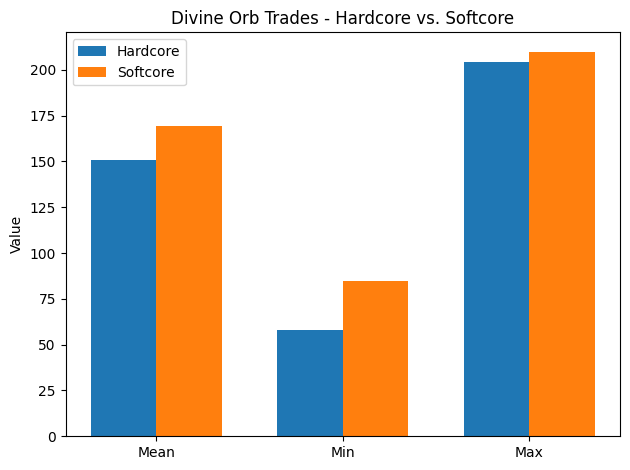

In [8]:
# Comparing divine orb's price between hardcore and softcore

import numpy as np
import matplotlib.pyplot as plt

hc_min = round(divine_df_hctrade["Value"].min(), 2)
hc_max = round(divine_df_hctrade["Value"].max(), 2)
hc_mean = round(divine_df_hctrade["Value"].mean(), 2)
sc_min = round(divine_df_sctrade["Value"].min(), 2)
sc_max = round(divine_df_sctrade["Value"].max(), 2)
sc_mean = round(divine_df_sctrade["Value"].mean(), 2)

# Print the results
print("Hardcore Trades:")
print("Minimum value:", hc_min)
print("Maximum value:", hc_max)
print("Mean value:", hc_mean)
print("")
print("Softcore Trades:")
print("Minimum value:", sc_min)
print("Maximum value:", sc_max)
print("Mean value:", sc_mean)

# Create a bar graph comparing the mean, min, and max values for hardcore and softcore trades
fig, ax = plt.subplots()

hc_data = [hc_mean, hc_min, hc_max]
sc_data = [sc_mean, sc_min, sc_max]
labels = ["Mean", "Min", "Max"]

x = np.arange(len(labels))
width = 0.35

rects1 = ax.bar(x - width/2, hc_data, width, label='Hardcore')
rects2 = ax.bar(x + width/2, sc_data, width, label='Softcore')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Divine Orb Trades - Hardcore vs. Softcore')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

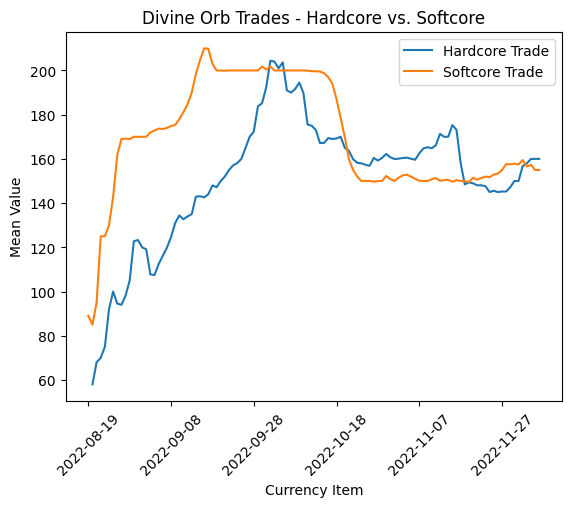

In [9]:
# Divine orb's fluctuations during the league

divine_hctrade_mean = divine_df_hctrade.groupby("Date")["Value"].mean()
divine_sctrade_mean = divine_df_sctrade.groupby("Date")["Value"].mean()

# Create a new dataframe with the means for each column in both dataframes
comparison_df = pd.DataFrame({
    "Hardcore Trade": divine_hctrade_mean,
    "Softcore Trade": divine_sctrade_mean
})

# Plot a line graph of the means for each column
ax = comparison_df.plot(kind="line")

# Set the title and labels
ax.set_title("Divine Orb Trades - Hardcore vs. Softcore")
ax.set_xlabel("Currency Item")
ax.set_ylabel("Mean Value")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Show the graph
plt.show()

           Date  Value_Divine_Per_Chaos
0    2022-08-19                  400.00
1    2022-08-20                   58.00
2    2022-08-21                   68.00
3    2022-08-22                   70.00
4    2022-08-23                   75.00
..          ...                     ...
105  2022-12-02                  156.75
106  2022-12-03                  157.95
107  2022-12-04                  160.00
108  2022-12-05                  160.00
109  2022-12-06                  160.00

[110 rows x 2 columns]
           Date  Value_Exalted_Per_Chaos
0    2022-08-20                 19.04762
1    2022-08-21                 12.00000
2    2022-08-22                 13.82235
3    2022-08-23                 15.00000
4    2022-08-24                 14.00000
..          ...                      ...
104  2022-12-02                 52.00000
105  2022-12-03                 52.00000
106  2022-12-04                 48.38947
107  2022-12-05                 48.38947
108  2022-12-06                 45.58421

[10

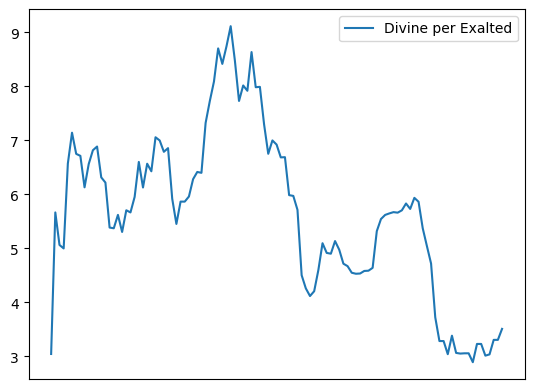

In [27]:
# How many divine orbs ($100 bills) you can buy with exalted orbs ($5 - $10 bills)

import pandas as pd
import matplotlib.pyplot as plt

# Filter trades for Chaos Orb
chaos_df_sctrade = df[df['Pay'] == 'Chaos Orb']

# Filter trades for Divine Orb and calculate the average value per Chaos Orb by date
divine_value_df_sctrade = chaos_df_sctrade[chaos_df_sctrade['Get'] == 'Divine Orb']
divine_conversion_rates = divine_value_df_sctrade.groupby('Date')['Value'].mean().reset_index()
divine_conversion_rates.columns = ['Date', 'Value_Divine_Per_Chaos']

# Filter trades for Exalted Orb and calculate the average value per Chaos Orb by date
exalted_value_df_sctrade = chaos_df_sctrade[chaos_df_sctrade['Get'] == 'Exalted Orb']
exalted_conversion_rates = exalted_value_df_sctrade.groupby('Date')['Value'].mean().reset_index()
exalted_conversion_rates.columns = ['Date', 'Value_Exalted_Per_Chaos']

# Calculate the conversion rate of Divine Orbs per Exalted Orb by date
divine_conversion_rates_per_exalted = divine_value_df_sctrade.groupby('Date')['Value'].mean().reset_index()
divine_conversion_rates_per_exalted.columns = ['Date', 'Value_Divine_Per_Exalted']
conversion_rates_both = pd.merge(exalted_conversion_rates, divine_conversion_rates_per_exalted, on='Date')
conversion_rates_both['Divine_Per_Exalted'] = conversion_rates_both['Value_Divine_Per_Exalted'] / conversion_rates_both['Value_Exalted_Per_Chaos']

# Print the conversion rate dataframes
print(divine_conversion_rates)
print(exalted_conversion_rates)
print(conversion_rates_both)

# Plot the conversion rates over time
plt.plot(conversion_rates_both['Date'], conversion_rates_both['Divine_Per_Exalted'], label='Divine per Exalted')
plt.legend()

# Remove x-axis tick labels
plt.xticks([])

plt.show()
